# Neural Network Regression with TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it to be: predicting a number.

For example, we might want to:

- Predict the selling price of houses given information about them (such as number of rooms, size, number of bathrooms).
- Predict the coordinates of a bounding box of an item in an image.
- Predict the cost of medical insurance for an individual given their demographics (age, sex, gender, race).

In this notebook, we're going to set the foundations for how we can take a sample of inputs (data), build a neural network to discover patterns in those inputs and then make a prediction (in the form of a number) based on those inputs.



## What we're going to cover

Specifically, we're going to go through doing the following with TensorFlow:
- Architecture of a regression model
- Input shapes and output shapes
  - `X`: features/data (inputs)
  - `y`: labels (outputs)
- Creating custom data to view and fit
- Steps in modelling
  - Creating a model
  - Compiling a model
    - Defining a loss function
    - Setting up an optimizer
    - Creating evaluation metrics
  - Fitting a model (getting it to find patterns in our data)
- Evaluating a model
  - Visualizng the model ("visualize, visualize, visualize")
  - Looking at training curves
  - Compare predictions to ground truth (using our evaluation metrics)
- Saving a model (so we can use it later)
- Loading a model

## Typical architecture of a regresison neural network

The word *typical* is on purpose.

Why?

Because there are many different ways (actually, there's almost an infinite number of ways) to write neural networks.

But the following is a generic setup for ingesting a collection of numbers, finding patterns in them and then outputting some kind of target number.


| **Hyperparameter** | **Typical value** |
| --- | --- |
| Input layer shape | Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction) |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited |
| Neurons per hidden layer | Problem specific, generally 10 to 100 |
| Output layer shape | Same shape as desired prediction shape (e.g. 1 for house price) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) |
| Output activation | None, ReLU, logistic/tanh |
| Loss function | [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) (mean square error) or [MAE](https://en.wikipedia.org/wiki/Mean_absolute_error) (mean absolute error)/Huber (combination of MAE/MSE) if outliers |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) |


> 🔑 **Note:** A **hyperparameter** in machine learning is something a data analyst or developer can set themselves, where as a **parameter** usually describes something a model learns on its own (a value not explicitly set by an analyst).


In [1]:
import tensorflow as tf
print(tf.__version__)
import datetime

2.18.0


## Creating data to view and fit
Since we're working on a regression problem (predicting a number) let's create some linear data (a straight line) to model.

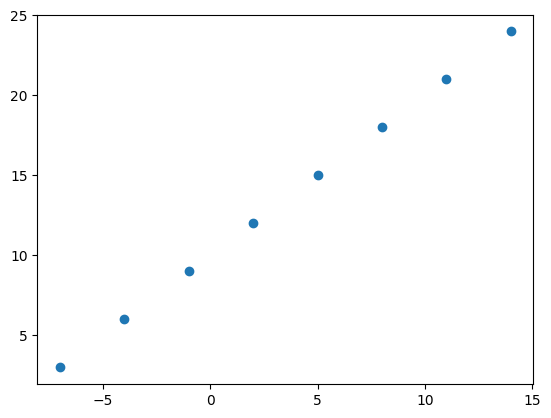

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

## Regression input shapes and output shapes

One of the most important concepts when working with neural networks are the input and output shapes.

The input shape is the shape of our data that goes into the model.

The output shape is the shape of our data we want to come out of our model.

These will differ depending on the problem we're working on.

Neural networks accept numbers and output numbers. These numbers are typically represented as tensors (or arrays).

Before, we created data using NumPy arrays, but we could do the same with tensors.

In [3]:
# create a demo tensor for housing price prediction problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [4]:
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [5]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with TensorFlow

Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1. **Creating a model** - piece together the layers of a neural network yourself (using the [Functional](https://www.tensorflow.org/guide/keras/functional) or [Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)) or import a previously built model (known as transfer learning).
2. **Compiling a model** - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
3. **Fitting a model** - letting the model try to find patterns in the data (how does `X` get to `y`).  

In [6]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])


# Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model
# model.fit(X,y, epochs = 5)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.0506 - mae: 9.0506
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step - loss: 8.9181 - mae: 8.9181
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 8.7856 - mae: 8.7856
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 8.6531 - mae: 8.6531
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 8.5206 - mae: 8.5206


In [7]:
# Check out X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [8]:
tf.expand_dims(X, axis=-1)

<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
array([[-7.],
       [-4.],
       [-1.],
       [ 2.],
       [ 5.],
       [ 8.],
       [11.],
       [14.]])>

In [9]:
# Make a prediction
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


array([[24.636492]], dtype=float32)

## Improving a model

How do we improve upon our current model?

By tweaking some of the things we did above.

To improve our model, we alter almost every part of the 3 steps we went through before.

1. **Creating a model** - here we might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. **Compiling a model** - we might want to choose optimization function or perhaps change the **learning rate** of the optimization function.
3. **Fitting a model** - perhaps we could fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).


*There are many different ways to potentially improve a neural network. Some of the most common include: increasing the number of layers (making the network deeper), increasing the number of hidden units (making the network wider) and changing the learning rate. Because these values are all human-changeable, they're referred to as [hyperparameters](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)) and the practice of trying to find the best hyperparameters is referred to as [hyperparameter tuning](https://en.wikipedia.org/wiki/Hyperparameter_optimization).*

In [10]:
# Let's do experiments to improve the model
# -epochs increased to 100
# - Add a hidden layer
# - Change the optimiser
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1)
])


# Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# Fit the model
# model.fit(X,y, epochs = 5)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 13.6700 - mae: 13.6700
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 12.6558 - mae: 12.6558
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 11.6584 - mae: 11.6584
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 10.6840 - mae: 10.6840
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 9.8721 - mae: 9.8721
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 9.0475 - mae: 9.0475
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 8.2180 - mae: 8.2180
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 7.3748 - mae: 7.3748
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 6.5098 - mae: 6.5098
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 5.6163 - mae: 5.6163
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 4.6904 - mae: 4.6904
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 3.9409 - mae: 3.9409
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48

In [11]:
# Make a prediction
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


array([[26.723125]], dtype=float32)

## Evaluating a model

A typical workflow we'll go through when building neural networks is:

```
Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...
```

The tweaking comes from maybe not building a model from scratch but adjusting an existing one.

### Visualize, visualize, visualize

When it comes to evaluation, we'll want to remember the words: "visualize, visualize, visualize."

This is because we're probably better looking at something (doing) than you are thinking about something.

It's a good idea to visualize:
* **The data** - what data are we working with? What does it look like?
* **The model itself** - what does the architecture look like? What are the different shapes?
* **The training of a model** - how does a model perform while it learns?
* **The predictions of a model** - how do the predictions of a model line up against the ground truth (the original labels)?

Let's start by visualizing the model.

But first, we'll create a little bit of a bigger dataset and a new model we can use (it'll be the same as before, but the more practice the better).


In [12]:
# Make a bigger dataset
X = tf.range(-100,100,4)
y = X + 10

X,y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

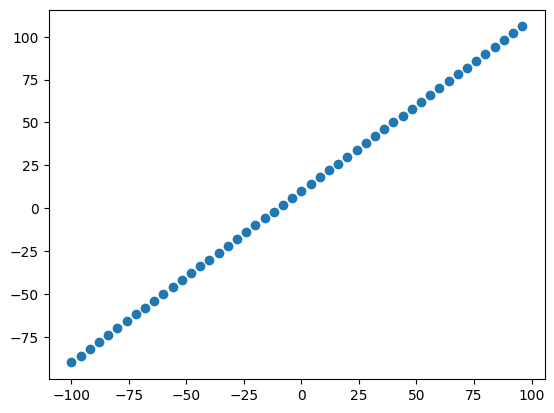

In [13]:
import matplotlib.pyplot as plt

plt.scatter(X,y)

## Split data into training/test set

One of the other most common and important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each set serves a specific purpose:
* **Training set** - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
* **Test set** - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).

For now, we'll just use a training and test set, this means we'll have a dataset for our model to learn on as well as be evaluated on.

We can create them by splitting our `X` and `y` arrays.

> 🔑 **Note:** When dealing with real-world data, this step is typically done right at the start of a project (the test set should always be kept separate from all other data). We want our model to learn on training data and then evaluate it on test data to get an indication of how well it **generalizes** to unseen examples.

In [14]:
len(X)

50

In [15]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

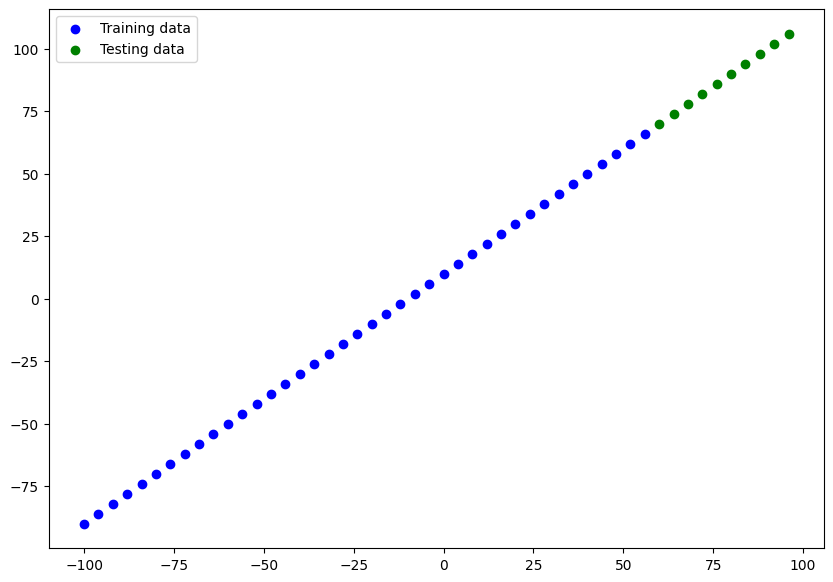

In [16]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend()


In [17]:
X[0].shape

TensorShape([])

In [45]:
# Set random seed
tf.random.set_seed(42)

# Create a model
# define the input_shape to our model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(5,input_shape = [1],name="input_layer"),
  # tf.keras.layers.Dense(10,name="Hidden_layer"),
  tf.keras.layers.Dense(1,name="output_layer")
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics=["mae"])

# Fit model (same as above)
#model.fit(X_train, y_train, epochs=100) # commented out on purpose (not fitting it just yet)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 5)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16 (64.00 B)

 Trainable params: 16 (64.00 B)

 Non-trainable params: 0 (0.00 B)

In [47]:
model.fit(X_train,y_train, epochs = 100, verbose=0)

In [37]:
# from tensorflow.keras.utils import plot_model
# plot_model(model, show_shapes=True)

## Visualizing the predictions

In [48]:
# Make predictions
y_preds = model.predict(X_test)
y_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


array([[ 65.268265],
       [ 69.133194],
       [ 72.99812 ],
       [ 76.86306 ],
       [ 80.72799 ],
       [ 84.592926],
       [ 88.45786 ],
       [ 92.3228  ],
       [ 96.18774 ],
       [100.052666]], dtype=float32)

In [29]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [32]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend()

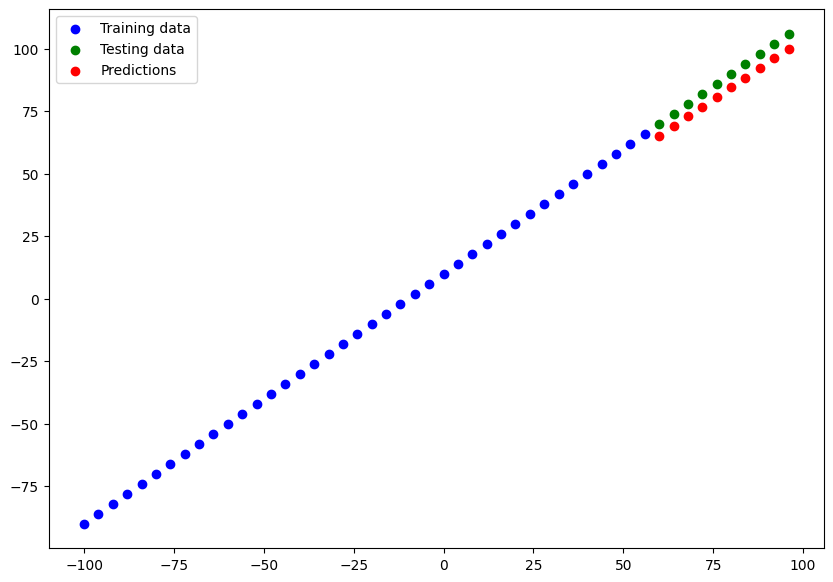

In [49]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

## Evaluating predictions

Alongisde visualizations, evaulation metrics are our alternative best option for evaluating the model.

Depending on the problem we're working on, different models have different evaluation metrics.

Two of the main metrics used for regression problems are:

- Mean absolute error (MAE) - the mean difference between each of the predictions.
- Mean squared error (MSE) - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).

In [50]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step - loss: 5.3395 - mae: 5.3395


[5.339537620544434, 5.339537620544434]

In [67]:
# Calculate the mean absolute error
mae = tf.keras.metrics.MeanAbsoluteError()
mae.update_state(y_test, y_preds)
mae_result = mae.result().numpy()
print("Mean Absolute Error:", mae_result)

Mean Absolute Error: 5.3395376


In [70]:
# Calculate the mean squared error
mse = tf.keras.metrics.MeanSquaredError()
mse.update_state(y_test, y_preds)
mse_result = mse.result().numpy()
print("Mean Squared Error:", mse_result)

Mean Squared Error: 28.661167


In [71]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  mae = tf.keras.metrics.MeanAbsoluteError()
  mae.update_state(y_test, y_pred)
  return mae.result().numpy()

def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  mse = tf.keras.metrics.MeanSquaredError()
  mse.update_state(y_test, y_pred)
  return mse.result().numpy()

## Running experiments to improve a model

Again, there are many different ways we can do this, but 3 of the main ones are:

1. Get more data - more opportunities to learn patterns.
2. Make your model larger (use a more complex model) - this might come in the form of more layers or more hidden units in each layer.
Train for longer - give our model more of a chance to find the patterns in the data.

Since we created our dataset, we could easily make more data but this isn't always the case when we're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:

1. model_1 - same as original model, 1 layer, trained for 100 epochs.
2. model_2 - 2 layers, trained for 100 epochs.
3. model_3 - 2 layers, trained for 500 epochs.

In [72]:
# Build model 1

# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - loss: 13.0626 - mae: 13.0626
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 11.2828 - mae: 11.2828
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 8.0625 - mae: 8.0625
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 9.7870 - mae: 9.7870
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 8.1702 - mae: 8.1702
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 8.7135 - mae: 8.7135
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 8.5803 - mae: 8.5803
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.3484 - mae: 8.3484
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 9.0910 - mae: 9.0910
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 8.1630 - mae: 8.1630
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 8.8301 - mae: 8.8301
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7.7521 - mae: 7.7521
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19m

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


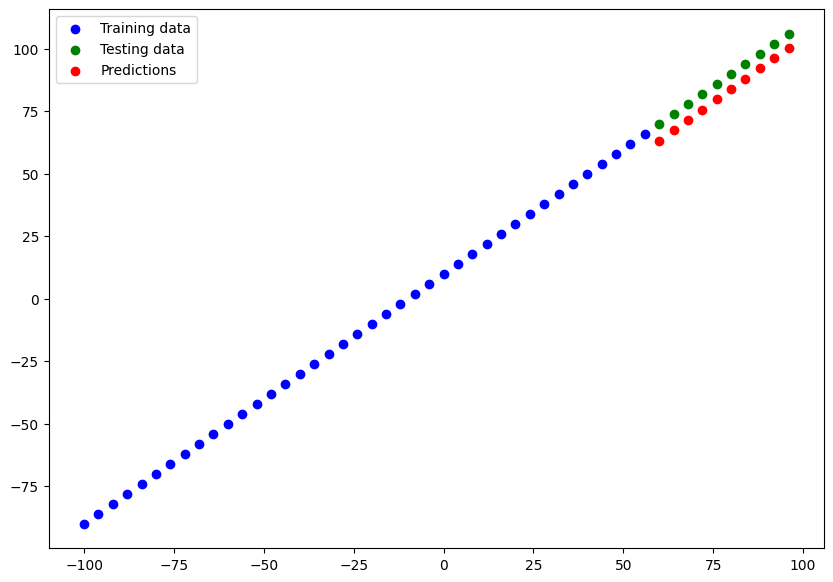

In [73]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [76]:
# Calculate model_1 metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(np.float32(6.1508474), np.float32(37.96062))

In [91]:
# Build model 2


# Set random seed
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics=['mae'])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0) # set verbose to 0 for less output


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


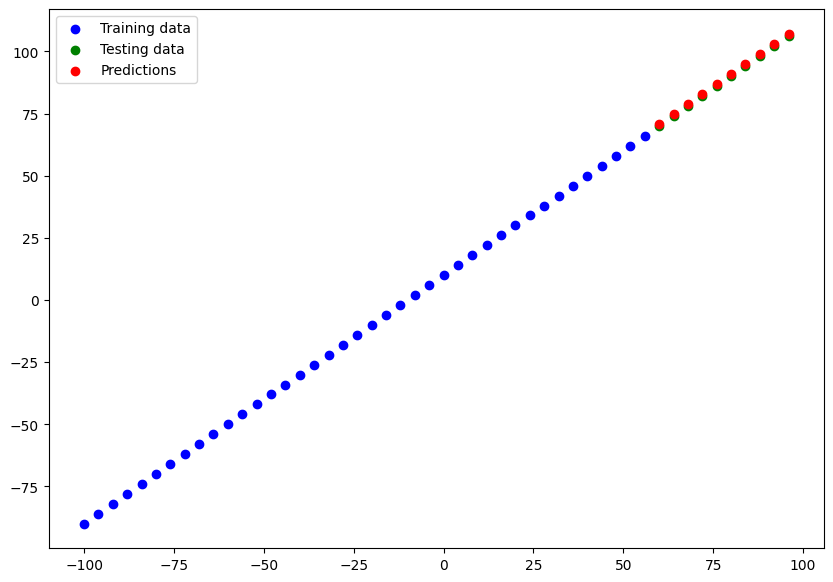

In [92]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [93]:
# Calculate model_2 metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2


(np.float32(0.8595398), np.float32(0.760955))

In [94]:
# Build Model 3

# Set random seed
tf.random.set_seed(42)

# Replicate model_2
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model (this time for 500 epochs, not 100)
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0) # set verbose to 0 for less output


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


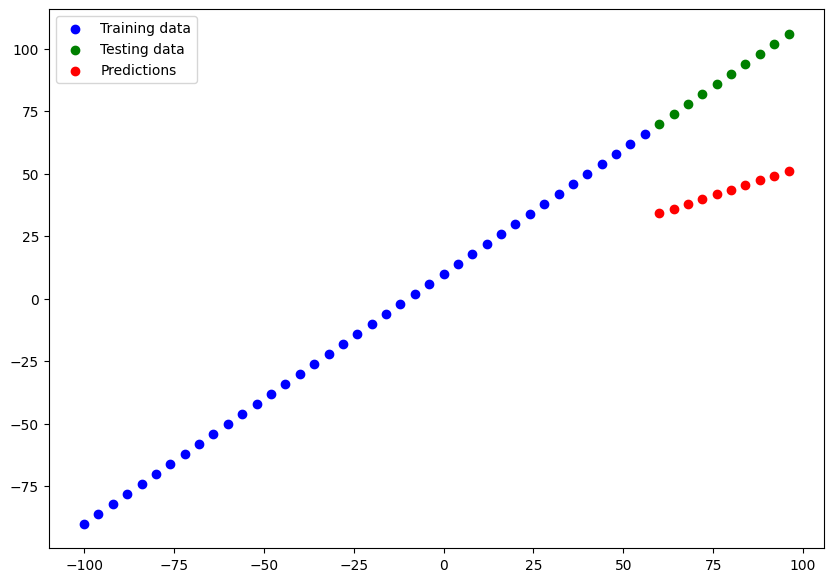

In [82]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [95]:
# Calculate model_3 metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3


(np.float32(45.352745), np.float32(2094.3542))

## Comparing results


In [96]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mae_3]]

import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,6.150847,37.960621
1,model_2,0.859540,0.760955
2,model_3,45.352745,45.352745


## Tracking your experiments

One really good habit to get into is tracking our modelling experiments to see which perform better than others.

We've done a simple version of this above (keeping the results in different variables).

- TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this later).
- Weights & Biases - a tool for tracking all kinds of machine learning experiments (the good news for Weights & Biases is it plugs into TensorBoard).

## Saving a model
Once we've trained a model and found one which performs, we'll probably want to save it for use elsewhere (like a web application or mobile device).

We can save a TensorFlow/Keras model using model.save().

There are two ways to save a model in TensorFlow:

- The SavedModel format (default).
- The HDF5 format.
The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

In [98]:
# Save a model using the SavedModel format
model_2.save('NN_regression.keras')

In [99]:
# Save a model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

In [100]:
# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model("NN_regression.keras")
loaded_saved_model.summary()


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95 (384.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64 (260.00 B)

In [103]:
# Compare model_2 with the SavedModel version (should return True)
model_2_preds = model_2.predict(X_test)
saved_model_preds = loaded_saved_model.predict(X_test)
mae(y_test, saved_model_preds) == mae(y_test, model_2_preds)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


np.True_

## A larger example

Let's step it up a notch and build a model for a more feature rich dataset.

More specifically we're going to try predict the cost of medical insurance for individuals based on a number of different parameters such as, age, sex, bmi, children, smoking_status and residential_region.

To do, we'll leverage the pubically available Medical Cost dataset available from Kaggle and hosted on GitHub.



In [104]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [105]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")


In [106]:
# Check out the insurance dataset
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


We're going to have to turn the non-numerical columns into numbers (because a neural network can't handle non-numerical inputs).

To do so, we'll use the get_dummies() method in pandas.

It converts categorical variables (like the sex, smoker and region columns) into numerical variables using one-hot encoding.

In [110]:
# Turn all categories into numbers
insurance_one_hot = pd.get_dummies(insurance, drop_first=True, dtype=int)
insurance_one_hot.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [111]:
# Create X & y values
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [112]:
# View features
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [113]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42) # set random state for reproducible splits


In [121]:
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01),
                        metrics=['mae'])

# Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 13248.3096 - mae: 13248.3096
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13007.5078 - mae: 13007.5078
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12495.1289 - mae: 12495.1289
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11593.7949 - mae: 11593.7949
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10325.4004 - mae: 10325.4004
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8995.4912 - mae: 8995.4912
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7962.4111 - mae: 7962.4111
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7495.4360 - mae: 7495.4360
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7395.5952 - mae: 7395.5952
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7363.0029 - mae: 7363.0029
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7342.8179 - mae: 7342.8179
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s

In [117]:
# Check the results of the insurance model
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6152.1421 - mae: 6152.1421


[5960.67333984375, 5960.67333984375]

Our model didn't perform very well, let's try a bigger model.

We'll try 3 things:

- Increasing the number of layers (2 -> 3).
- Increasing the number of units in each layer (except for the output layer).
- Changing the Lr.

Everything else will stay the same.

In [122]:
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate = 0.05),
                        metrics=['mae'])

# Fit the model
history = insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 10162.7168 - mae: 10162.7168
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6878.9292 - mae: 6878.9292
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6328.7988 - mae: 6328.7988
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5989.8252 - mae: 5989.8252
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4993.0137 - mae: 4993.0137
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4340.6201 - mae: 4340.6201
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3792.1528 - mae: 3792.1528
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3749.9180 - mae: 3749.9180
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4108.3110 - mae: 4108.3110
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3660.6912 - mae: 3660.6912
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3701.6604 - mae: 3701.6604
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/st

In [123]:
# Evaluate our larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 3353.0413 - mae: 3353.0413


[3267.491455078125, 3267.491455078125]

Much better! Using a larger model and the Adam optimizer results in almost half the error as the previous model.

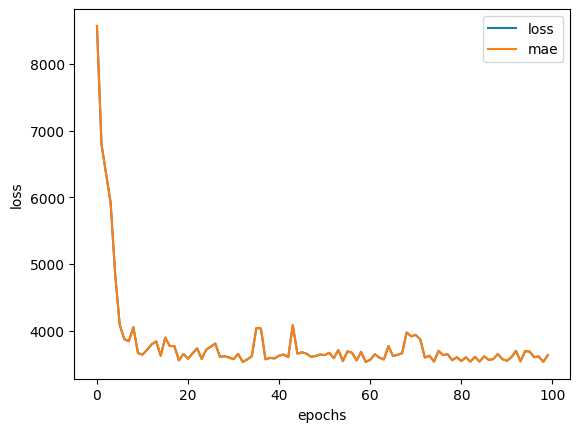

In [124]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

## Preprocessing data (normalization and standardization)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")


In [2]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


o do this, we're going to use a few classes from Scikit-Learn:

- make_column_transformer - build a multi-step data preprocessing function for the folllowing transformations:
 -  MinMaxScaler - make sure all numerical columns are normalized (between 0 and 1).
 - OneHotEncoder - one hot encode the non-numerical columns.

In [3]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(handle_unknown = "ignore"),["sex","smoker","region"])
)

# Create X and y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)




In [4]:
X_train.loc[0]

,0
age,19
sex,female
bmi,27.9
children,0
smoker,yes
region,southwest


In [10]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [11]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [12]:

# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate= 0.01),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
insurance_model_3.fit(X_train_normal, y_train, epochs=200, verbose=0)

In [13]:
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, y_test)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 3212.5317 - mae: 3212.5317
